In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('/content/Titanic Toy Data.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [5]:
df.isnull().mean()

,0
Age,0.198653
Fare,0.050505
Family,0.000000
Survived,0.000000


In [6]:
X = df.drop(columns=['Survived'])
y = df['Survived']



In [7]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state=2)

In [8]:
x_train.isnull().mean()

,0
Age,0.207865
Fare,0.050562
Family,0.000000


In [11]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
median_fare = x_train['Fare'].median()

In [15]:
x_train['age_median'] = x_train['Age'].fillna(median_age)
x_train['age_mean'] = x_train['Age'].fillna(mean_age)

x_train['fare_median'] = x_train['Fare'].fillna(median_fare)
x_train['fare_mean'] = x_train['Fare'].fillna(mean_fare)

x_train.sample(5)

,Age,Fare,Family,age_median,age_mean,fare_median,fare_mean
46,NaN,15.5000,1,28.75,29.785904,15.5000,15.5000
620,27.0,14.4542,1,27.00,27.000000,14.4542,14.4542
322,30.0,12.3500,0,30.00,30.000000,12.3500,12.3500
223,NaN,7.8958,0,28.75,29.785904,7.8958,7.8958
548,33.0,20.5250,2,33.00,33.000000,20.5250,20.5250


In [16]:
print('orignal age variable variance',x_train['Age'].var())
print('age variance after median imputation',x_train['age_median'].var())
print('age varaince after mean imputation',x_train['age_mean'].var())

print('original fare variable variance',x_train['Fare'].var())
print('fare variance after median imputation',x_train['fare_median'].var())
print('fare variance after mean imputation',x_train['fare_mean'].var())

orignal age variable variance 204.3495133904614
age variance after median imputation 161.9895663346054
age varaince after mean imputation 161.81262452718673
original fare variable variance 2448.197913706318
fare variance after median imputation 2340.0910219753637
fare variance after mean imputation 2324.2385256705547


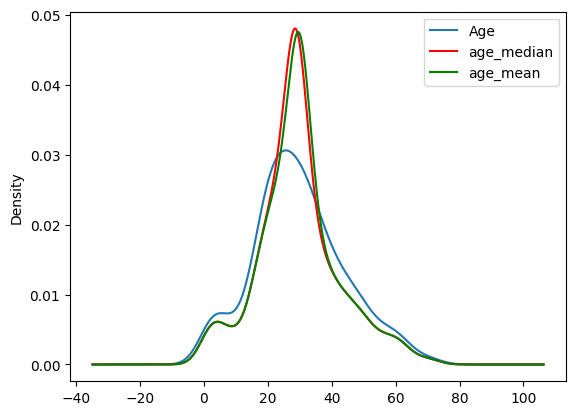

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)

#orignal variable distribution
x_train['Age'].plot(kind = 'kde',ax =ax)

#variable imputed with median
x_train['age_median'].plot(kind='kde',ax = ax,color='red')

# variable impute dwith mean
x_train['age_mean'].plot(kind = 'kde',ax=ax,color='green')

#add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

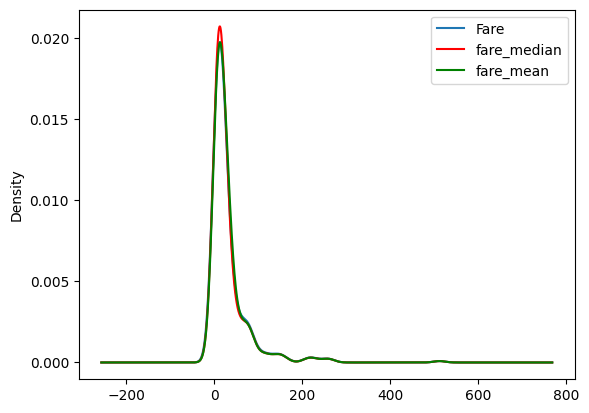

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

#original variable distribution
x_train['Fare'].plot(kind = 'kde',ax= ax)

#variable imputed with the median
x_train['fare_median'].plot(kind ='kde',ax=ax,color='red')

#variable imputed with the mean
x_train['fare_mean'].plot(kind = 'kde',ax=ax,color='green')

#add legends
lines,labels = ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

In [19]:
x_train.cov()

,Age,Fare,Family,age_median,age_mean,fare_median,fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,64.858859,66.665205
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.476305,16.385048
age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,53.553455,55.023037
age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,51.358000,52.788341
fare_median,64.858859,2448.197914,16.476305,53.553455,51.358000,2340.091022,2324.238526
fare_mean,66.665205,2448.197914,16.385048,55.023037,52.788341,2324.238526,2324.238526


In [20]:
x_train.corr()

,Age,Fare,Family,age_median,age_mean,fare_median,fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.087356,0.090156
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205942,0.205499
age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.086982,0.089673
age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.083461,0.086078
fare_median,0.087356,1.000000,0.205942,0.086982,0.083461,1.000000,0.996607
fare_mean,0.090156,1.000000,0.205499,0.089673,0.086078,0.996607,1.000000


<Axes: >

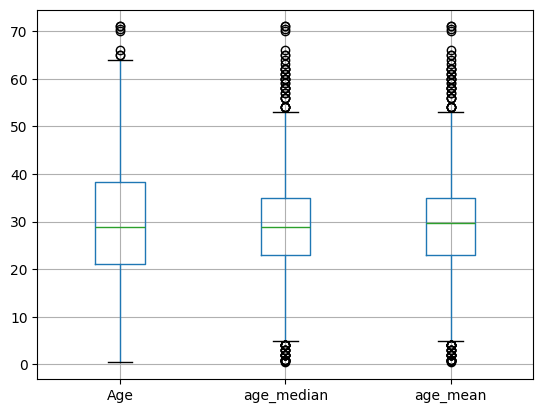

In [21]:
x_train[['Age','age_median','age_mean']].boxplot()

<Axes: >

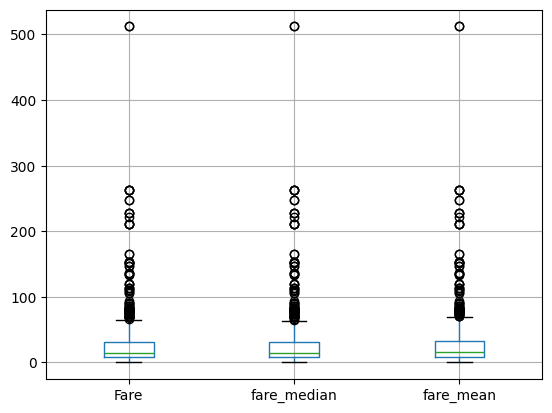

In [22]:
x_train[['Fare','fare_median','fare_mean']].boxplot()

Using sklearn

In [23]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=2)

In [24]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [26]:
trf = ColumnTransformer([('imputer1',imputer1,['Age']),('imputer2',imputer2,['Fare'])],remainder = 'passthrough')

In [27]:
trf.fit(x_train)

/usr/local/lib/python3.12/dist-packages/sklearn/compose/_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [28]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [29]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [30]:
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])